<a href="https://colab.research.google.com/github/sumantsharma16/Deep-learning/blob/main/car_pricePredictionShriddharn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependeces

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 


Data collection and processing


In [ ]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

Inspecting the first five rows of our data frame

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


checking the missing values in the dataframe

In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

checking the shape of dataframe

In [ ]:
car_dataset.shape

(301, 9)

Getting some information of this dataframe

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


checking the distrution of catagorical data

In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


convert text value in numerical value i.e encoding the data

In [ ]:
# encoding Fuel Type column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# encoding "Seller Type"
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

#encoding "Trainsmission "
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting the data into trainig and test data

In [ ]:
x=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)

y = car_dataset['Selling_Price']

In [ ]:
print(y)

splitting the data and target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

model training 

1. Linear Regression model

In [ ]:
# loading linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model evaluation

In [ ]:
# prediction of training data

training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
# R square error
error_score= metrics.r2_score(y_train, training_data_prediction)
print("R square errors:", error_score )

R square errors: 0.8799451660493711


Plotting the values visulizing the actual price and predicted prices

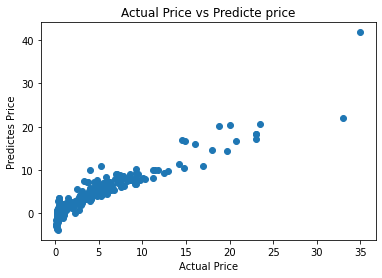

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictes Price")
plt.title("Actual Price vs Predicte price")
plt.show()

In [ ]:
# predicting the test data 
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
# R square value

error_score = 